# **Abstract**
E-Commerce shipping company data has its previous costomer orders datails to learn and predict wheather shipping is completed on time or not.So I think this Problem statement will be intersting to visualize and analize to predict the target variable.

# **About Data Set**

> The dataset contained 10999 observations of 12 variables.

> Independant variables : 


> 1. Warehouse_block
> 2. Mode_of_Shipment
> 3. Customer_care_calls
> 4. Cost_of_the_Product
> 5. Prior_purchases
> 6. Product_importance
> 7. Gender
> 8. Weight_in_gms

> Dependant variable or Target Variable : 

> 1. Reached.on.Time_Y.N (Yes/No) which has 0 for reached on time and  1 for not reached on time
















###Importing required dependencies and Loading the data

In [77]:
#installing required dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [78]:
#Reading the data set
data = pd.read_csv("/content/sample_data/DataSet.csv")

In [79]:
#Viewing Head of the file
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [80]:
#Checking Missing data in the data set
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

**From the above table we can infer there are no missing data in the dara set**

**Checking value counts of categorical and numerical columns:**

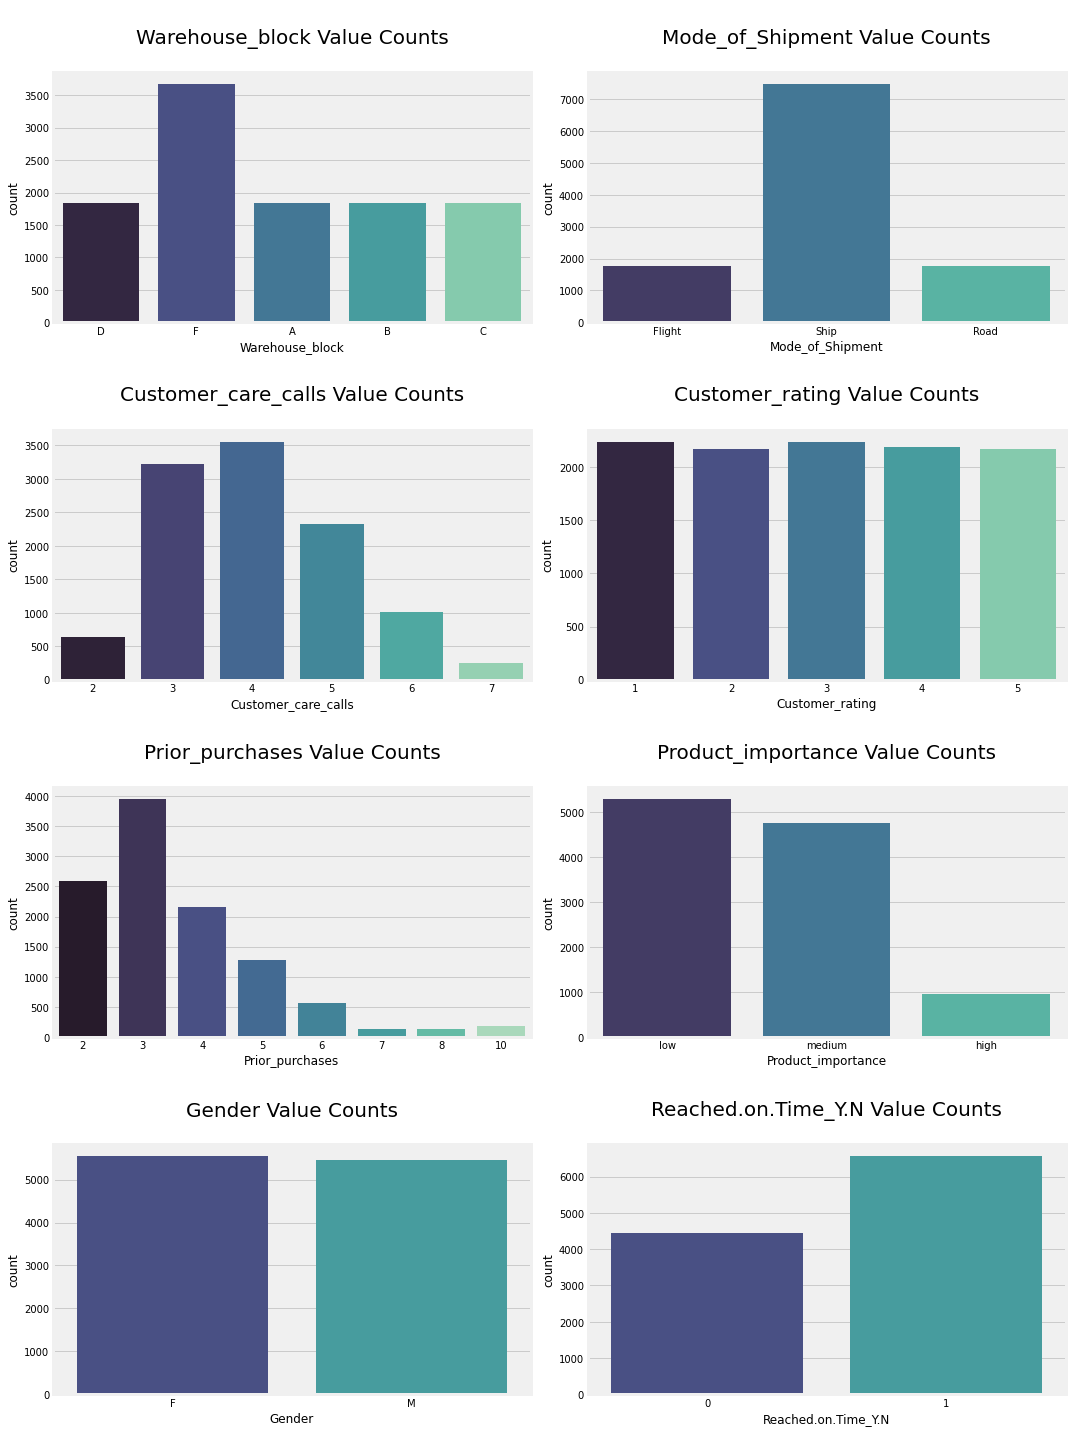

In [81]:
from re import X
#Considering all the columns for ploting
columns= ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize=(15,20))


#Ploting all the column using countplot to check ranges in numerical data and types in catagorical data
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 8 :
      ax = plt.subplot(4,2,plotnumber)
      sns.countplot(x = columns[i],data = data,ax = ax,palette='mako')
      plt.title(f"\n{columns[i]} Value Counts\n",fontsize = 20)
    plotnumber += 1

plt.tight_layout()
plt.show()



From the above ploting we can infer :


*   Customer rating has very less variance 
*   Gender has very less variance 
*   Most of the products are of low importance 
*   Prior purchase by customer ranges from 2-10 
*   Not reached on time data is more than the reached on time data
*   There are 4 catogorical data 
      1.   Warehouse Block
      2.   Mode of Shipment
      3.   Product Importance
      4.   Gender

**Checking realtion of categorical columns with the target varibale reached on time or not**

In [82]:
object_columns = data.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


**Realtion of Warehouse block data and Target variable**

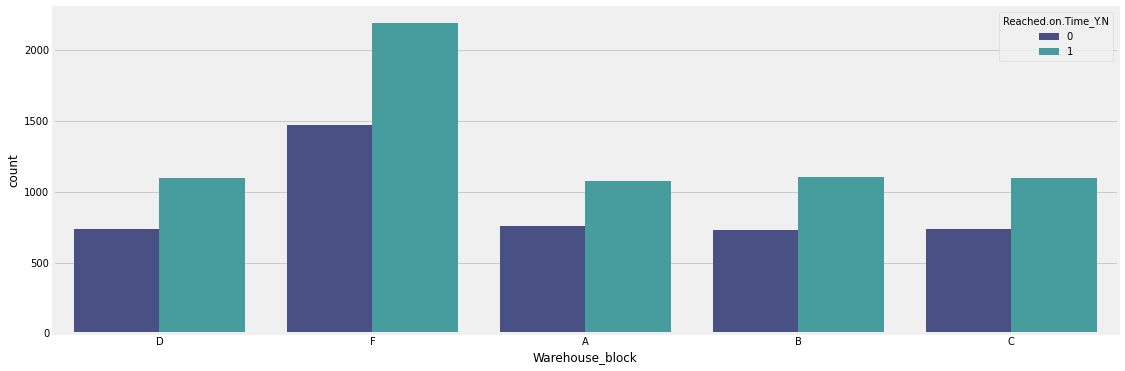

In [83]:
plt.figure(figsize = (17,6))
sns.countplot('Warehouse_block',hue = 'Reached.on.Time_Y.N', data = data , palette = 'mako')

**Realtion of Mode_of_Shipment data and Target variable**

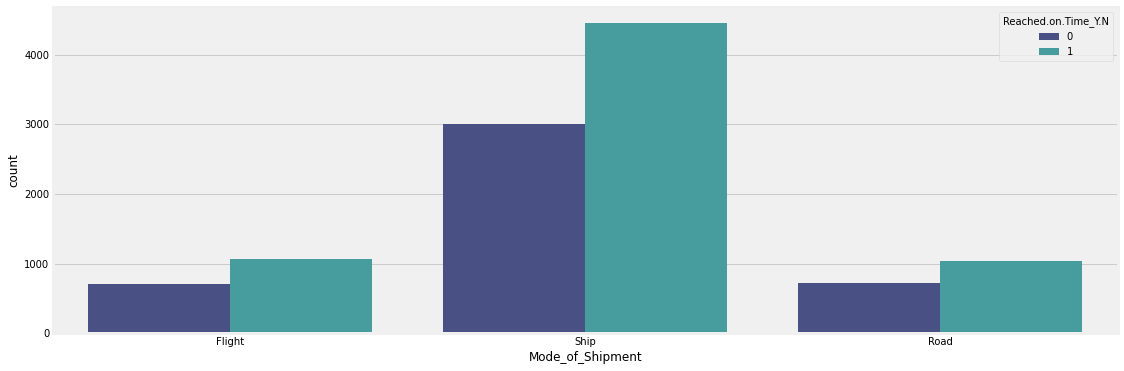

In [84]:
plt.figure(figsize = (17,6))
sns.countplot('Mode_of_Shipment',hue = 'Reached.on.Time_Y.N', data = data , palette = 'mako')

**Realtion of Product_importance data and Target variable**

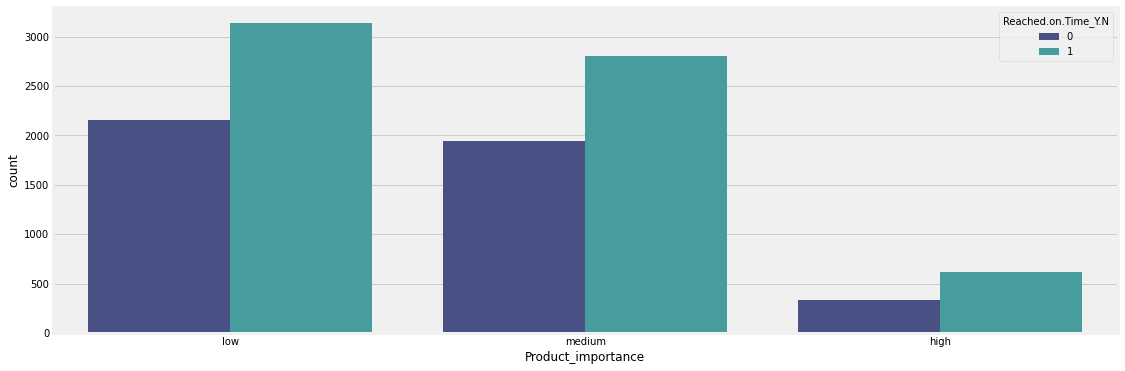

In [85]:
plt.figure(figsize = (17,6))
sns.countplot('Product_importance',hue = 'Reached.on.Time_Y.N', data = data , palette = 'mako')

**Realtion of Product_importance data and Target variable**

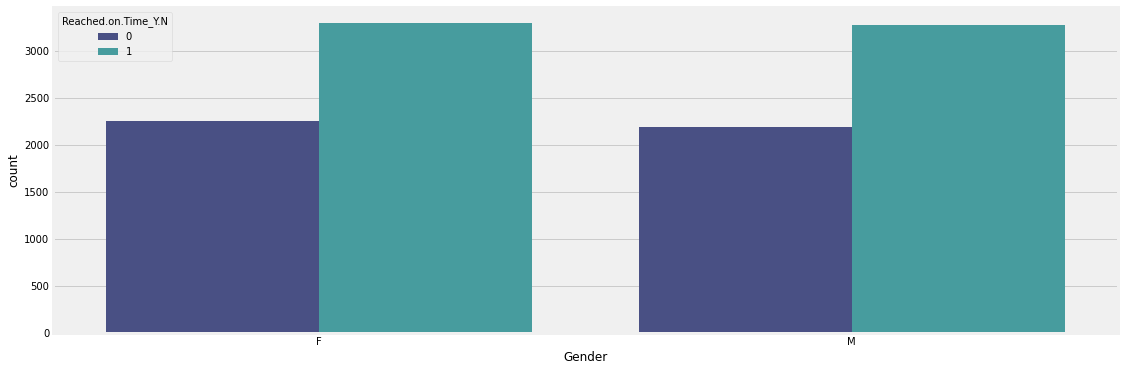

In [86]:
plt.figure(figsize = (17,6))
sns.countplot('Gender',hue = 'Reached.on.Time_Y.N', data = data , palette = 'mako')

##Checking the distribution of numerical independent variables

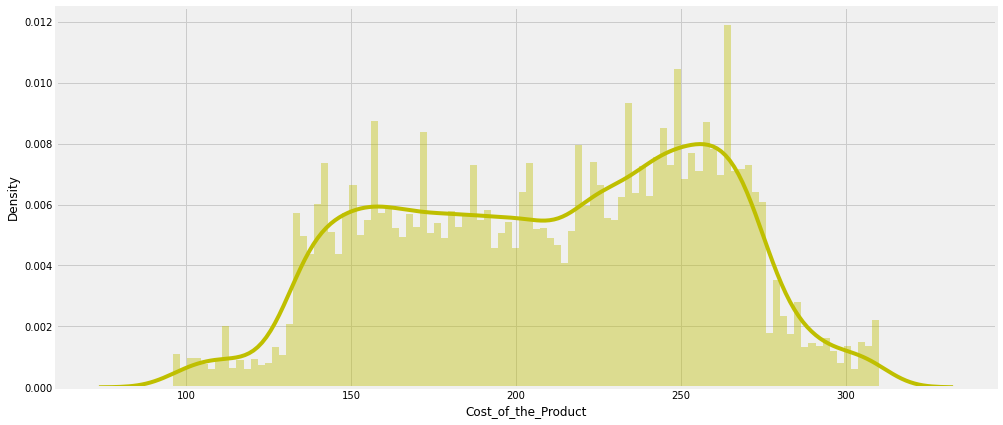

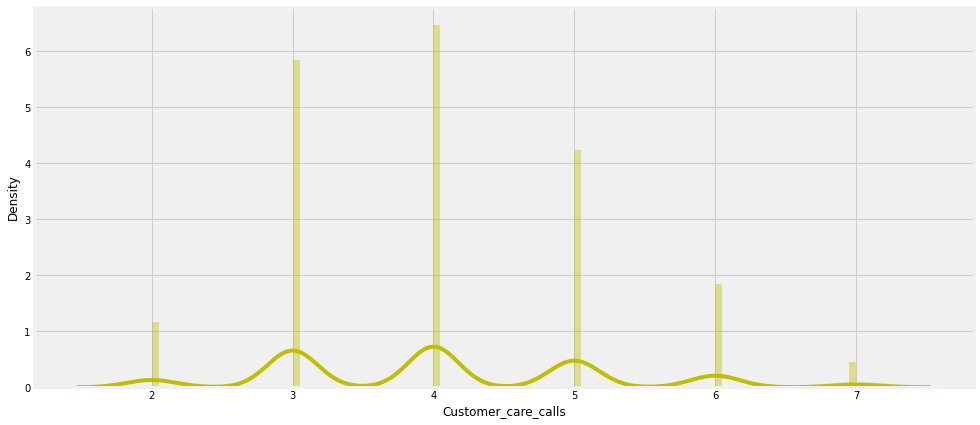

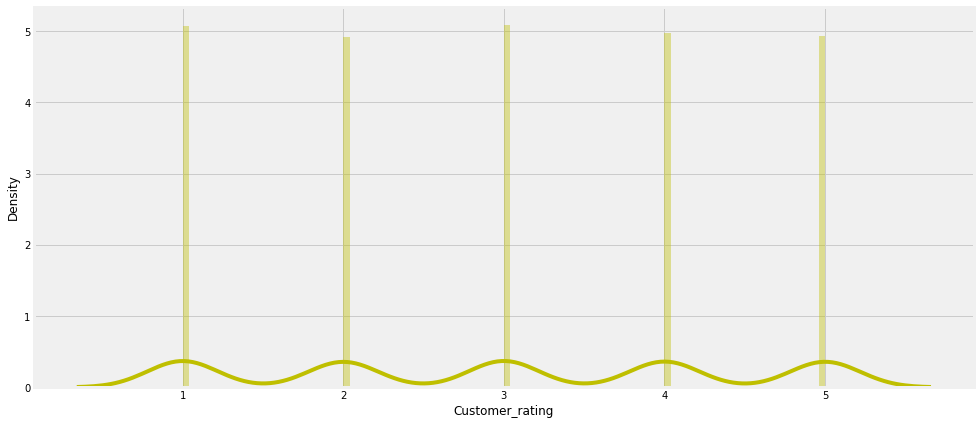

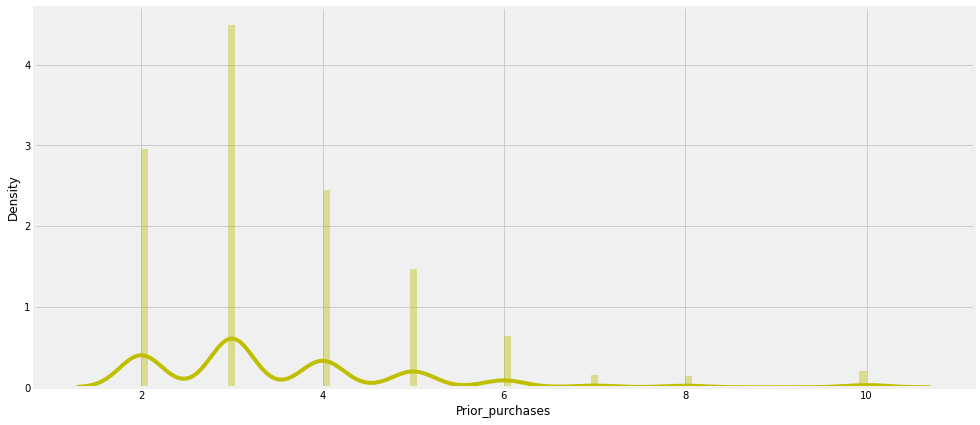

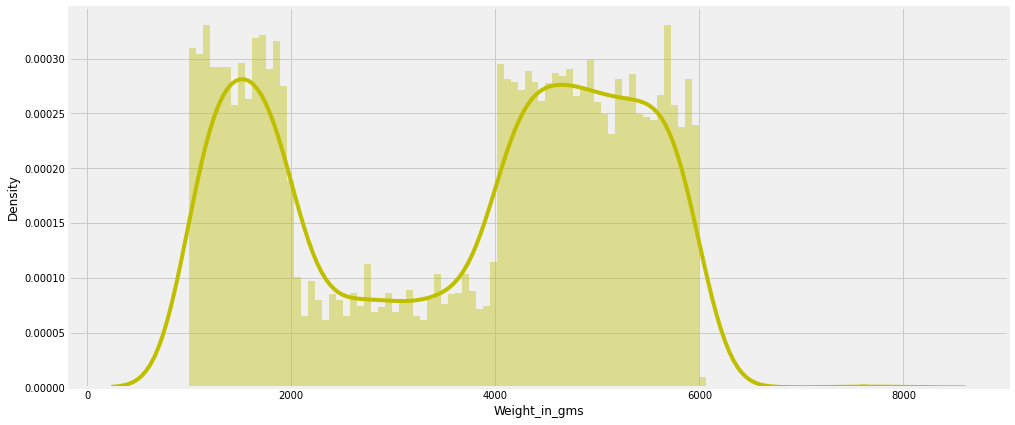

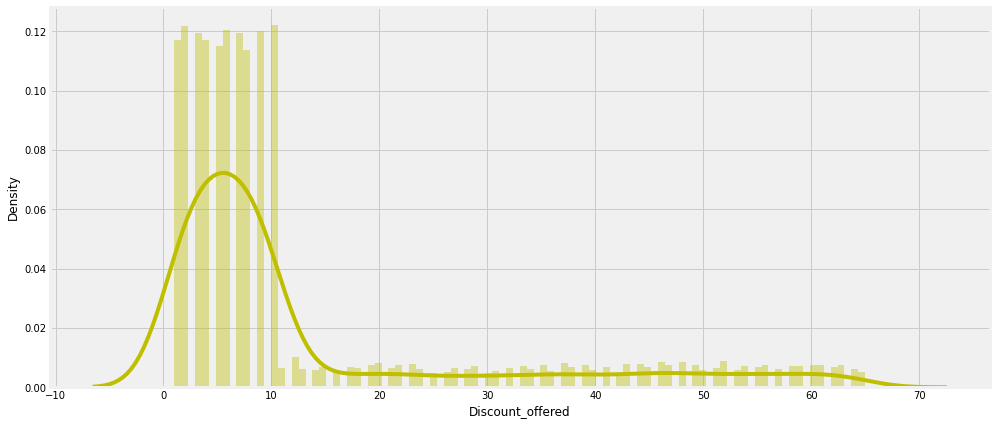

In [87]:

columns= ['Cost_of_the_Product','Customer_care_calls', 'Customer_rating','Prior_purchases','Weight_in_gms','Discount_offered']

import plotly.express as px

for c in columns[:]:
  plt.figure(figsize = (15, 7))
  ax = sns.distplot(data[c], bins = 100, color = 'y')
  plt.show()



From the above ploting we can infer that independent varibales are almost normaly distributed and there are some outliners and requires data manupulation to create a model and test it.


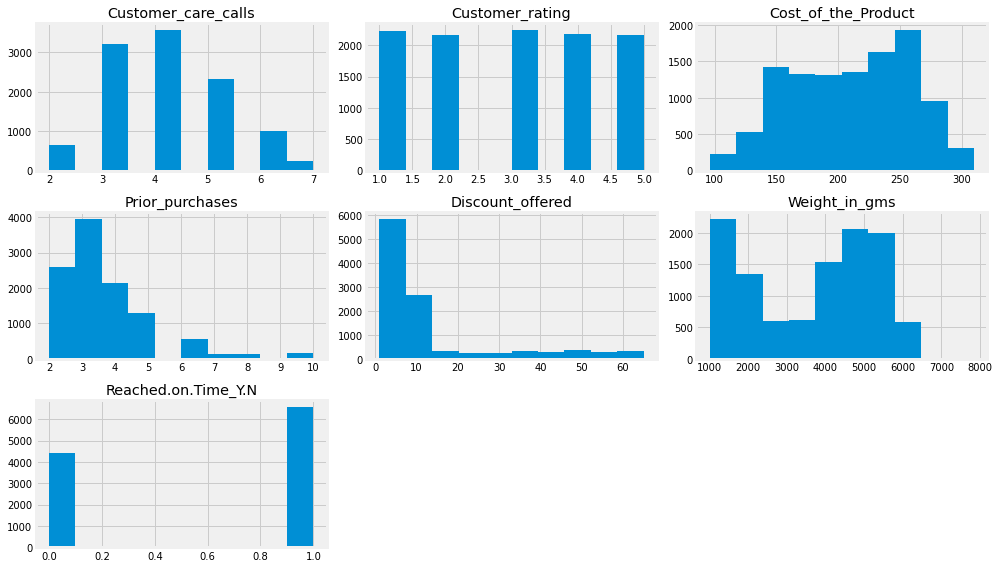

In [88]:
data.hist(figsize=(14, 8))
plt.tight_layout()

#Data Manupulation and Feature creation and Analysis

In [89]:
#Creating binary vaiables for all categorical columns

data = pd.get_dummies(data)

# Normalizing the data 
from sklearn import preprocessing
x = data[['Reached.on.Time_Y.N']]

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Reached.on.Time_Y.N']] = pd.DataFrame(x_scaled)

In [90]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1.0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1.0,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1.0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1.0,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1.0,0,0,1,0,0,1,0,0,0,0,1,1,0


From the above table we can see the data is normalized after preproccesing 

# Checking the outliers


In [91]:
data.describe()[['Weight_in_gms', 'Cost_of_the_Product','Discount_offered']]

,Weight_in_gms,Cost_of_the_Product,Discount_offered
count,10999.000000,10999.000000,10999.000000
mean,3634.016729,210.196836,13.373216
std,1635.377251,48.063272,16.205527
min,1001.000000,96.000000,1.000000
25%,1839.500000,169.000000,4.000000
50%,4149.000000,214.000000,7.000000
75%,5050.000000,251.000000,10.000000
max,7846.000000,310.000000,65.000000


##Checking the corelation of the features

In [92]:
data.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,-0.006375,-0.013428,0.004099,-0.000401,0.012732,0.019093,0.003292,-0.017629,-0.048995,0.047111,-0.019761,-0.002545,0.002545
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,-0.010471,-0.003222,0.001093,0.008687,0.003092,-0.002481,0.001516,0.000765,0.000679,-0.004752,0.004408,-0.002775,0.002775
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,-0.013299,0.018260,0.009255,0.006618,-0.016472,-0.008130,0.002531,0.004419,-0.040421,0.037361,-0.014785,-0.019759,0.019759
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,0.002979,0.002178,-0.003750,0.010095,-0.009095,-0.000263,0.003913,-0.002864,0.018066,-0.024921,0.014902,0.009395,-0.009395
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,-0.004157,-0.005135,0.000736,-0.007714,0.012864,-0.005750,-0.007787,0.010643,0.024514,-0.019638,0.005920,0.011777,-0.011777
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,-0.005078,0.000461,0.002000,-0.001414,0.003187,-0.001245,0.004146,-0.002273,0.069775,-0.080468,0.041634,-0.003573,0.003573
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,-0.009317,0.005106,0.000132,0.000830,0.002568,0.004371,-0.007671,0.002577,0.033242,-0.007667,-0.011099,-0.004689,0.004689
Warehouse_block_A,-0.006375,-0.010471,-0.013299,0.002979,-0.004157,-0.005078,-0.009317,1.000000,-0.199978,-0.199978,-0.200044,-0.316189,0.000570,0.000461,-0.000811,0.006098,0.012815,-0.016380,0.001911,-0.001911
Warehouse_block_B,-0.013428,-0.003222,0.018260,0.002178,-0.005135,0.000461,0.005106,-0.199978,1.000000,-0.199978,-0.200044,-0.316189,-0.000093,0.000461,-0.000289,-0.010419,-0.013551,0.019570,-0.007847,0.007847
Warehouse_block_C,0.004099,0.001093,0.009255,-0.003750,0.000736,0.002000,0.000132,-0.199978,-0.199978,1.000000,-0.200044,-0.316189,-0.000755,0.000461,0.000233,0.008706,-0.004274,-0.000621,-0.001504,0.001504


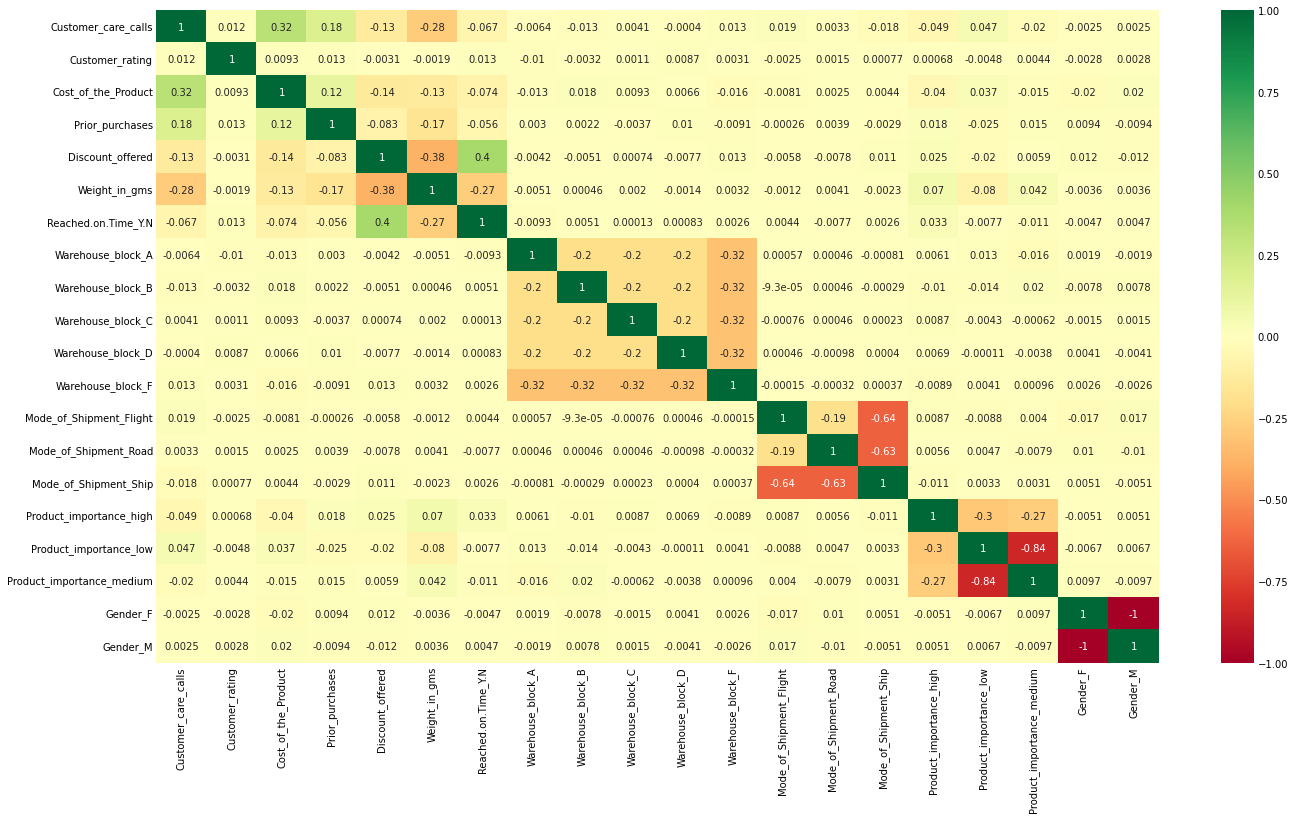

In [93]:
#the heat map of the correlation
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

From the above heat map we can infer that there not much correlation between the features and target variable or within independent varibale. Only discout offered and weight in grams has some correlation with the target variable.

#Building a Model
##Train ,Validation and Test split

In [94]:
columns= ['Customer_care_calls',	'Customer_rating',	'Cost_of_the_Product',	'Prior_purchases',	'Discount_offered',	'Weight_in_gms',	'Warehouse_block_A',	'Warehouse_block_B',	'Warehouse_block_C',	'Warehouse_block_D',	'Warehouse_block_F',	'Mode_of_Shipment_Flight',	'Mode_of_Shipment_Road',	'Mode_of_Shipment_Ship',	'Product_importance_high',	'Product_importance_low',	'Product_importance_medium',	'Gender_F',	'Gender_M']
from sklearn.model_selection import  train_test_split
X = data[columns]

y = data['Reached.on.Time_Y.N']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

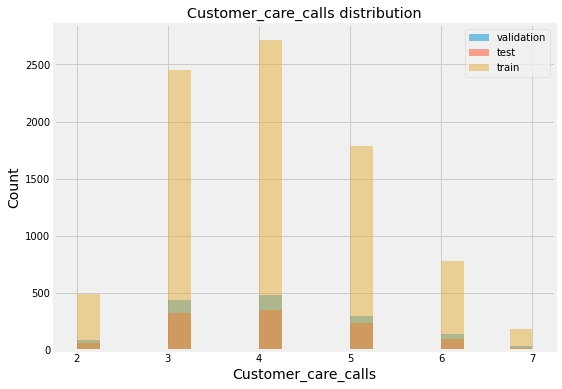

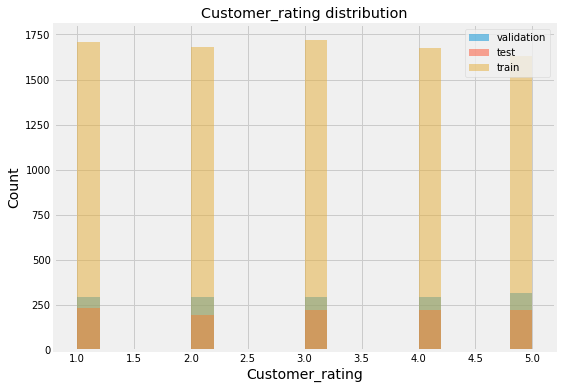

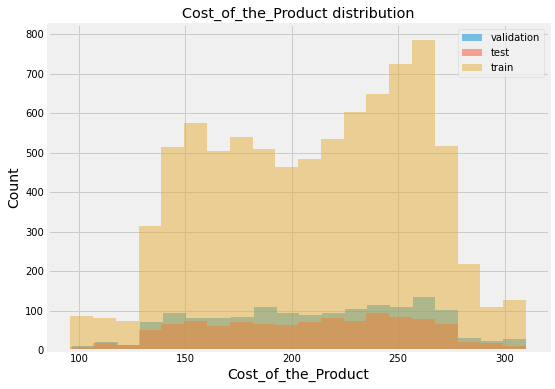

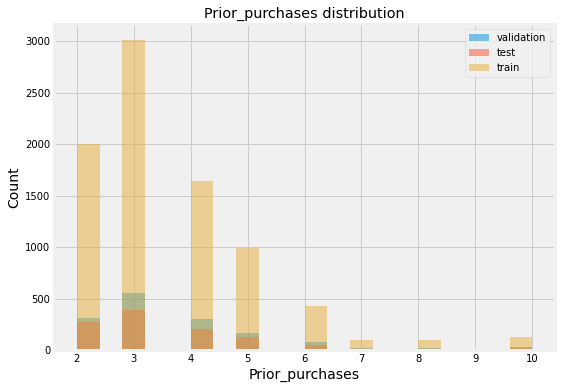

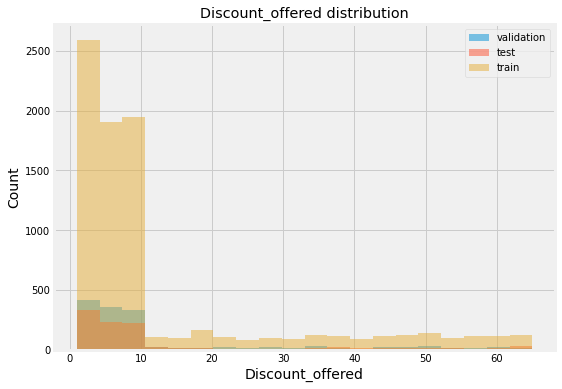

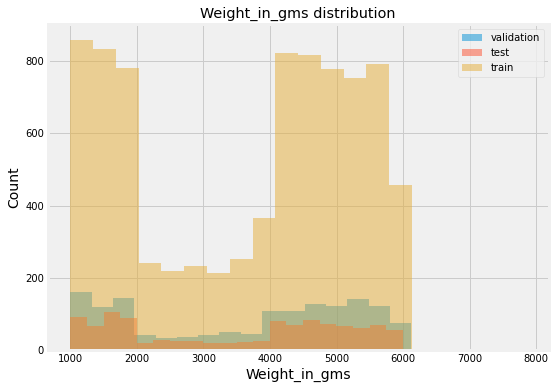

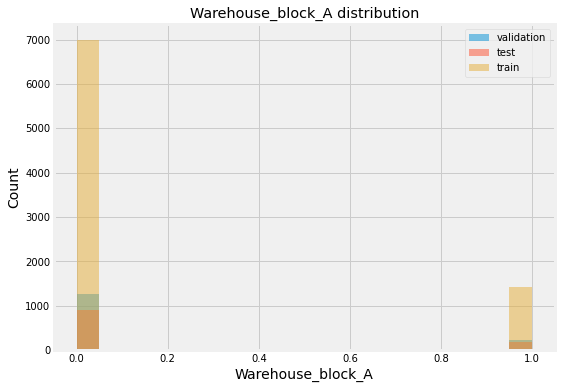

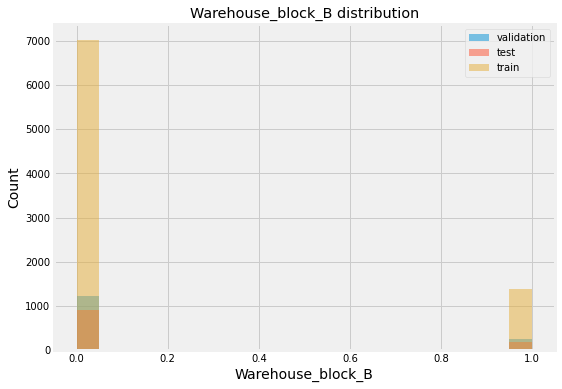

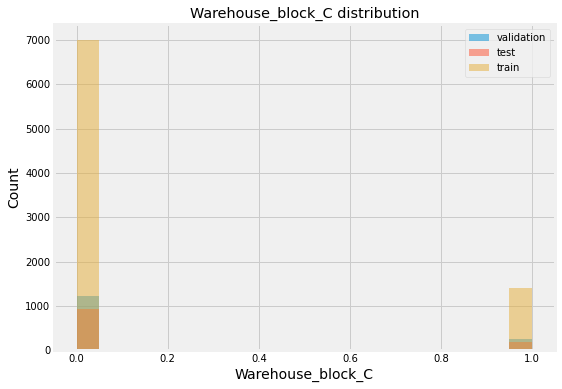

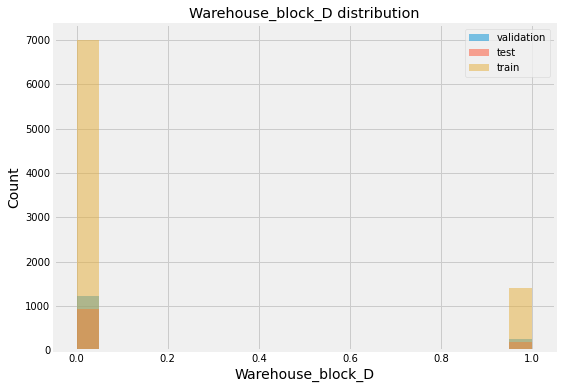

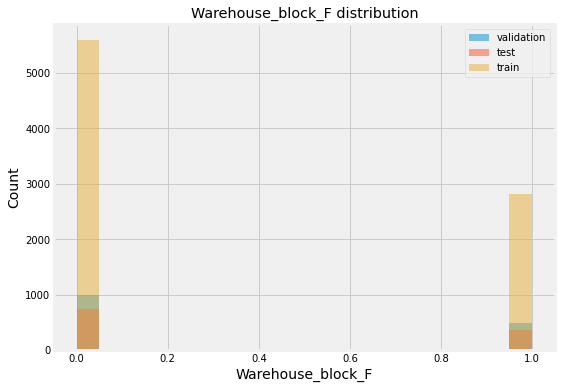

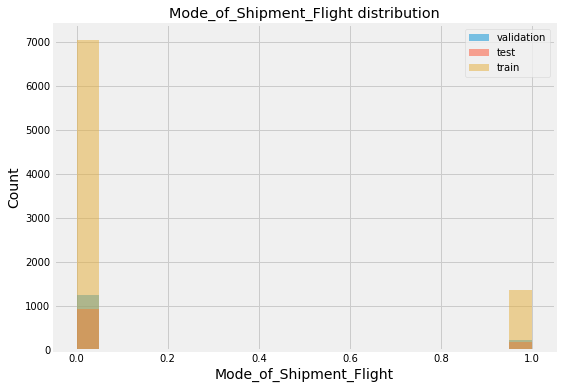

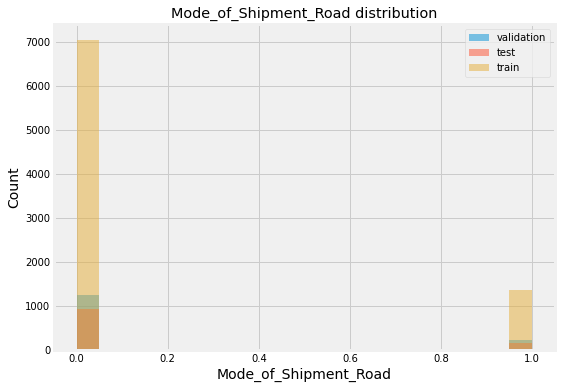

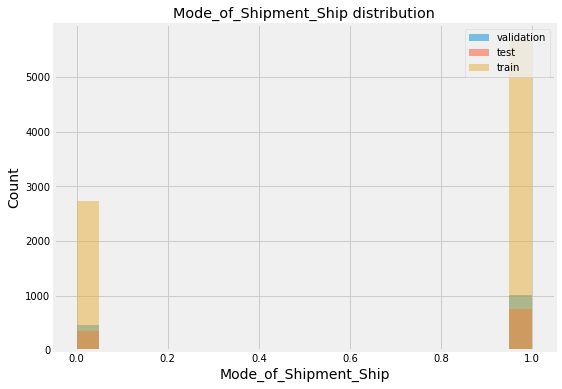

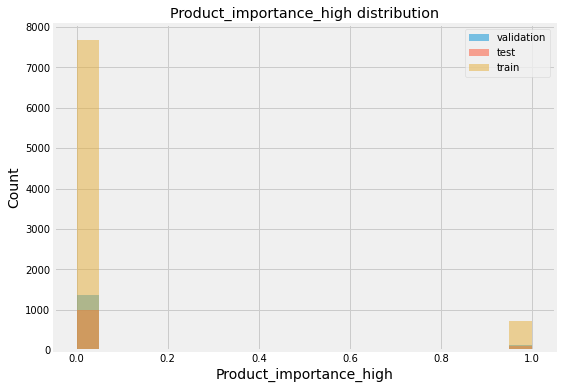

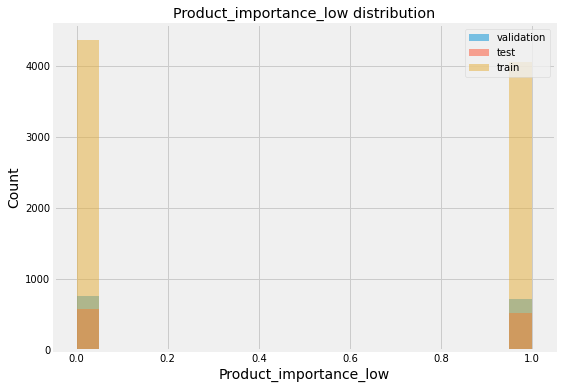

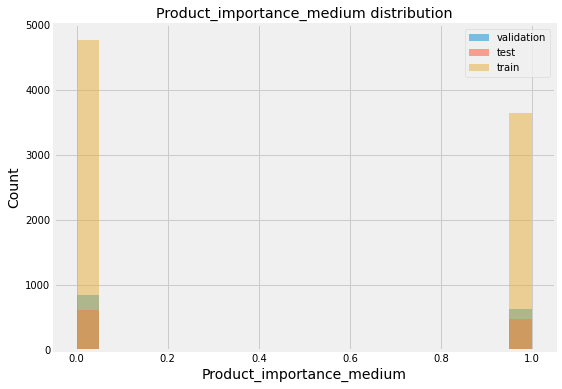

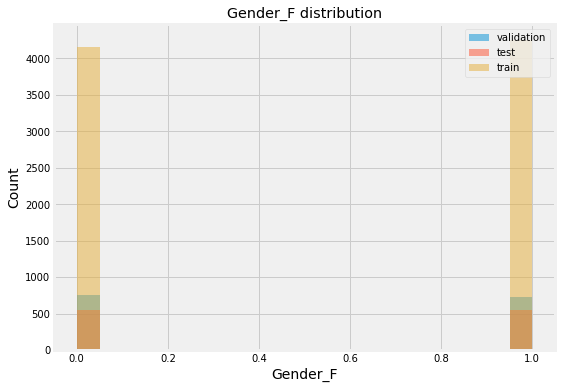

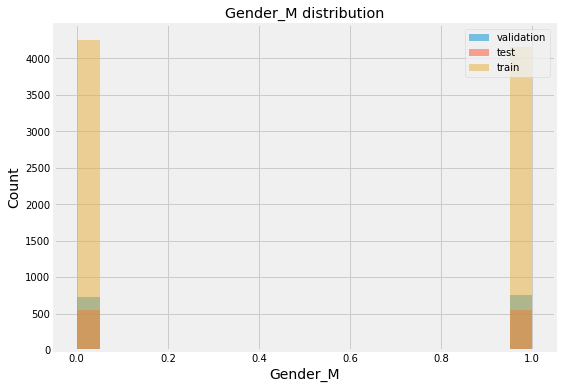

In [95]:
# Looking the data for test, training and validation set
X_test_plot = X_test[columns]

X_val_plot = X_val[columns]

X_train_plot = X_train[columns]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

#RandomForestClassifier
I'm selecting random forest classifier for this use case beacause we need to predict the order delivered on time or not. so for classification I'm fitting the RandomForestClassifier model with this data set because it uses averaging to improve the predictive accuracy and control over-fitting.

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [97]:
# Create RandomForestClassifier classifier
classifier = RandomForestClassifier(n_estimators=100,random_state=101,max_features = 'sqrt',n_jobs=-1, verbose = 1)


# Train the model using the training sets
classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=101,
                       verbose=1)

#Making predictions

In [98]:
# Make predictions using the testing set
Y_Pred = classifier.predict(X_test)

# creating confusion matrix for test and prediction data
cm = confusion_matrix(y_test, Y_Pred)
print(cm)
print(classifier.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


[[304 116]
 [239 441]]
0.6772727272727272


so the accuracy is 66% by using all the features and let me check the imporat features used for prediction in the next step.

##checking important features

In [99]:
#checking important features
pd.DataFrame(classifier.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
Weight_in_gms,0.267788
Discount_offered,0.218870
Cost_of_the_Product,0.168670
Prior_purchases,0.066252
Customer_rating,0.060444
Customer_care_calls,0.058573
Warehouse_block_F,0.016098
Product_importance_medium,0.013470
Warehouse_block_C,0.013128
Mode_of_Shipment_Ship,0.013054


#Understanding the important features

In [100]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(classifier).fit(X_test, y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

Weight,Feature
0.0360 ± 0.0187,Weight_in_gms
0.0278 ± 0.0249,Discount_offered
0.0091 ± 0.0190,Cost_of_the_Product
0.0071 ± 0.0092,Warehouse_block_C
0.0038 ± 0.0014,Warehouse_block_D
0.0027 ± 0.0147,Prior_purchases
0.0007 ± 0.0089,Warehouse_block_B
0.0005 ± 0.0015,Product_importance_high
0.0004 ± 0.0061,Mode_of_Shipment_Road
0.0002 ± 0.0121,Product_importance_low


So the features which are imporat to predict the targer variable are Weight in gms, Discount offered and Cost of the product.
so Let us try to predict the target variable using only these 3 columns and check if the accurancy improves.

#Train and predict using only important features

In [101]:
# considering only the 3 imporatnt features to train the model

X_3cols = data[["Weight_in_gms","Cost_of_the_Product","Discount_offered"]]

y_3cols = data["Reached.on.Time_Y.N"]

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t_3cols, X_test_3cols, y_t_3cols, y_test_3cols = train_test_split(X_3cols, y_3cols, test_size=0.1, random_state=1)

X_train_3cols, X_val_3cols, y_train_3cols, y_val_3cols = train_test_split(X_t_3cols, y_t_3cols, test_size=0.15, random_state=1)

In [102]:
# Fit the model with the new training data 
classifier = RandomForestClassifier(n_estimators=100,random_state=101,max_features = 'sqrt',n_jobs=-1, verbose = 1)
classifier.fit(X_train_3cols,y_train_3cols)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=101,
                       verbose=1)

In [103]:
#Checking the accuracy of the model
print(classifier.score(X_test_3cols, y_test_3cols))

0.6954545454545454


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


##So now the accuracy increased to 70% from 66%.
so the important columns ars only helping to predict the target variable without other non impotant features or independent variable are not much correlated as we see in headmap of correlation in the above cells.

#Imputation

Removing 1%, 5%, and 10% of your data randomly and impute the values back

In [112]:
data_with_missing = pd.read_csv("/content/sample_data/DataSet.csv")
data_with_missing.isnull().sum()

Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance       0
Gender                   0
Discount_offered         0
Weight_in_gms          122
Reached.on.Time_Y.N      0
dtype: int64

In [113]:
data_with_missing.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10877.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3648.372253,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1636.747169,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1842.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4171.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5062.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [114]:
#calculating mean to fill the missing values
meanVal = data_with_missing['Weight_in_gms'].mean()
print(meanVal)
data_with_missing['Weight_in_gms'].fillna(value=meanVal, inplace=True)

3648.372253378689


In [115]:
data_with_missing.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [116]:
data_with_missing.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3648.372253,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1627.643695,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1852.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [117]:
import statsmodels.api as sm

#define response variable
y = data_with_missing['Weight_in_gms']

#define explanatory variable
x = data['Weight_in_gms']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 

In [118]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

[-0.23411185 -0.12338479 -0.10631607 ... -0.23876882 -0.23548505
 -0.20987339]


I used Mean value to fill the missing data for the one of the important feature in data set weight in grams and calculated the standardized_residuals error

#Answer the following questions

**1.What are the data types? (Only numeric and categorical)**

A: Both Numerical and categorical data types

Numerical Data
1. Cost_of_the_Product
2. Customer_care_calls
3. Customer_rating
4. Prior_purchases
5. Weight_in_gms
6. Discount_offered

Categorical Data

  1.   Warehouse Block
  2.   Mode of Shipment
  3.   Product Importance
  4.   Gender



**Are there missing values??**

A: No missing data.

**What are the likely distributions of the numeric variables?**

A: 
* They are mostly normally distributed and some features like Prior purchases ,customer rating, customer calls are with less range values.

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**
A: 
1.   Wieght in grams
2.   Discount offered
3.   Cost_of_the_Product

**Which independent variables have missing data? How much?**
A:
* Non of the Independent variable has missing data
* No null values


**Do the training and test sets have the same data**
A:
* Yes, most of the data are same in test, train and validation set.


**In the predictor variables independent of all the other predictor variables**
A:
* No, they are not independet of each other, because while I droped all the non important features and trained the model it increases the accuracy and correlation is not found between all the independent variables.

**Which predictor variables are the most important?**

A:
1.   Wieght in grams
2.   Discount offered
3.   Cost_of_the_Product

**Do the ranges of the predictor variables make sense?**
A:
*   Most of the predictor varibales are in very less ranges like prior order are only ranging from 0-10 orders in whole data set.
*   Customer care calls are also ranging from 0-7 in the whole data set so there were not much significant to predict the target variable.
*   Wieght, cost of product and discount offered has wide range of values which was normally distributed and that has lesser P values so it was significat to predict the target variable wheather package is reached on time or not.

**What are the distributions of the predictor variables?**

A:
*   Weight in grams and cost of the product are normally distributed and has wide range of values in the data set.
*   Discount offer is higher for lower values and other discounts are almost same.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

A: Not much differnce in the accuracy beacuse there are no big outliers in the data set except weight of the product.




**Refernces**

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. Skunks_Skool notebooks in Github
